In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import transform
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 5000)

# Acquire & Prepare

### import everything from folder and put them into one dataframe - race, income, age, pop, pcat

In [2]:
df = transform.load_all('/Users/nicolegarza/digital_inclusion/Data')

In [3]:
df.head()

blockgroup  male_age_bin_0-19_p  male_age_bin_20-29_p  males_age_bin_30-44_p  male_age_bin_45-59_p  male_age_bin_60+_p  female_age_bin_0-19_p  female_age_bin_20-29_p  females_age_bin_30-44_p  female_age_bin_45-59_p  female_age_bin_60+_p  pop_tot  income_median  income_0-19k_p  income_20-24k_p  income_25-39k_p  income_40-64k_p  income_65k+_p   White_p  African_American_p  Native_American_p   Asian_p  Hawaiian_Pac_Islander_p  Hispanic/Latino_p  pcat_10x1_mean  pcat_10x1_median
0  480291101001             0.000000              0.164000               0.290000              0.094000            0.070000               0.016000                0.130000                 0.084000                0.050000              0.102000      500          31314        0.284848         0.018182         0.384848         0.093939       0.218182  0.864000            0.026000           0.000000  0.010000                      0.0           0.318000               4                 4
1  480291101002             0.045521              0.117474               0.066079              0.130690            0.245228               0.000000                0.020558                 0.058737                0.093979              0.221733      681          45655        0.240000         0.046316         0.115789         0.320000       0.277895  0.883994            0.055800           0.000000  0.000000                      0.0           0.512482               4                 4
2  480291101003             0.056018              0.147046               0.257330              0.091028            0.102407               0.030197                0.055580                 0.122976                0.073085              0.064333     2285          47988        0.261603         0.034810         0.168776         0.108650       0.426160  0.766740            0.045952           0.010503  0.002626                      0.0           0.737418               4                 4
3  480291103001             0.152971              0.077750               0.104298              0.081542            0.063211               0.143489                0.139064                 0.132111                0.061315              0.044248     1582          25104        0.408931         0.090482         0.054054         0.095182       0.351351  0.580278            0.228824           0.003161  0.000000                      0.0           0.618837               2                 2
4  480291103002             0.084871              0.095941               0.119004              0.122694            0.088561               0.089483                0.057196                 0.178967                0.048893              0.114391     1084          37146        0.354839         0.000000         0.163772         0.330025       0.151365  0.782288            0.000000           0.009225  0.008303                      0.0           0.861624               2                 2

# Explore

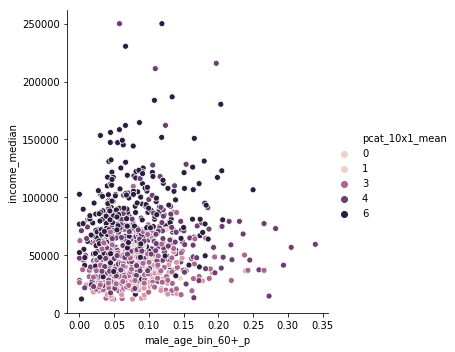

In [4]:
sns.relplot(x="male_age_bin_60+_p", y="income_median", hue="pcat_10x1_mean", data=df)

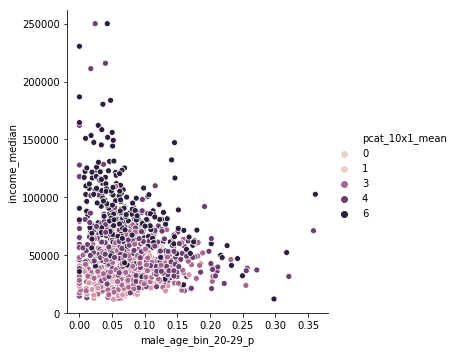

In [5]:
sns.relplot(x="male_age_bin_20-29_p", y="income_median", hue="pcat_10x1_mean", data=df)

#### age doesn't seem to be a huge driver. However, it the 20-29 age group does appear to have a higher connectivity speed.

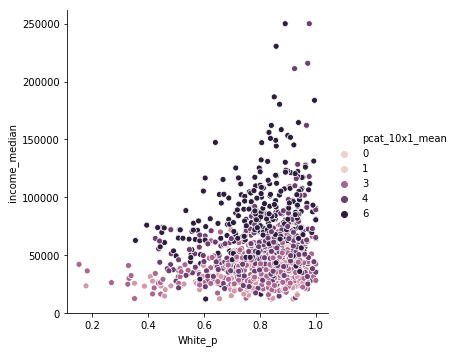

In [6]:
sns.relplot(x="White_p", y="income_median", hue="pcat_10x1_mean", data=df)

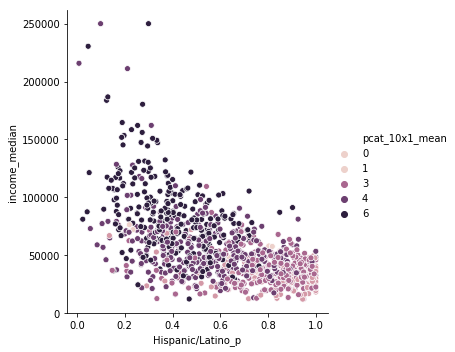

In [7]:
sns.relplot(x="Hispanic/Latino_p", y="income_median", hue="pcat_10x1_mean", data=df)

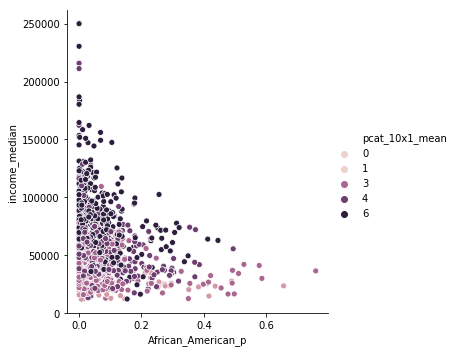

In [8]:
sns.relplot(x="African_American_p", y="income_median", hue="pcat_10x1_mean", data=df)

#### race really seems to be a large driver. The more hispanics there are in a blockgroup, the connectivity goes down and vice versa for whites.

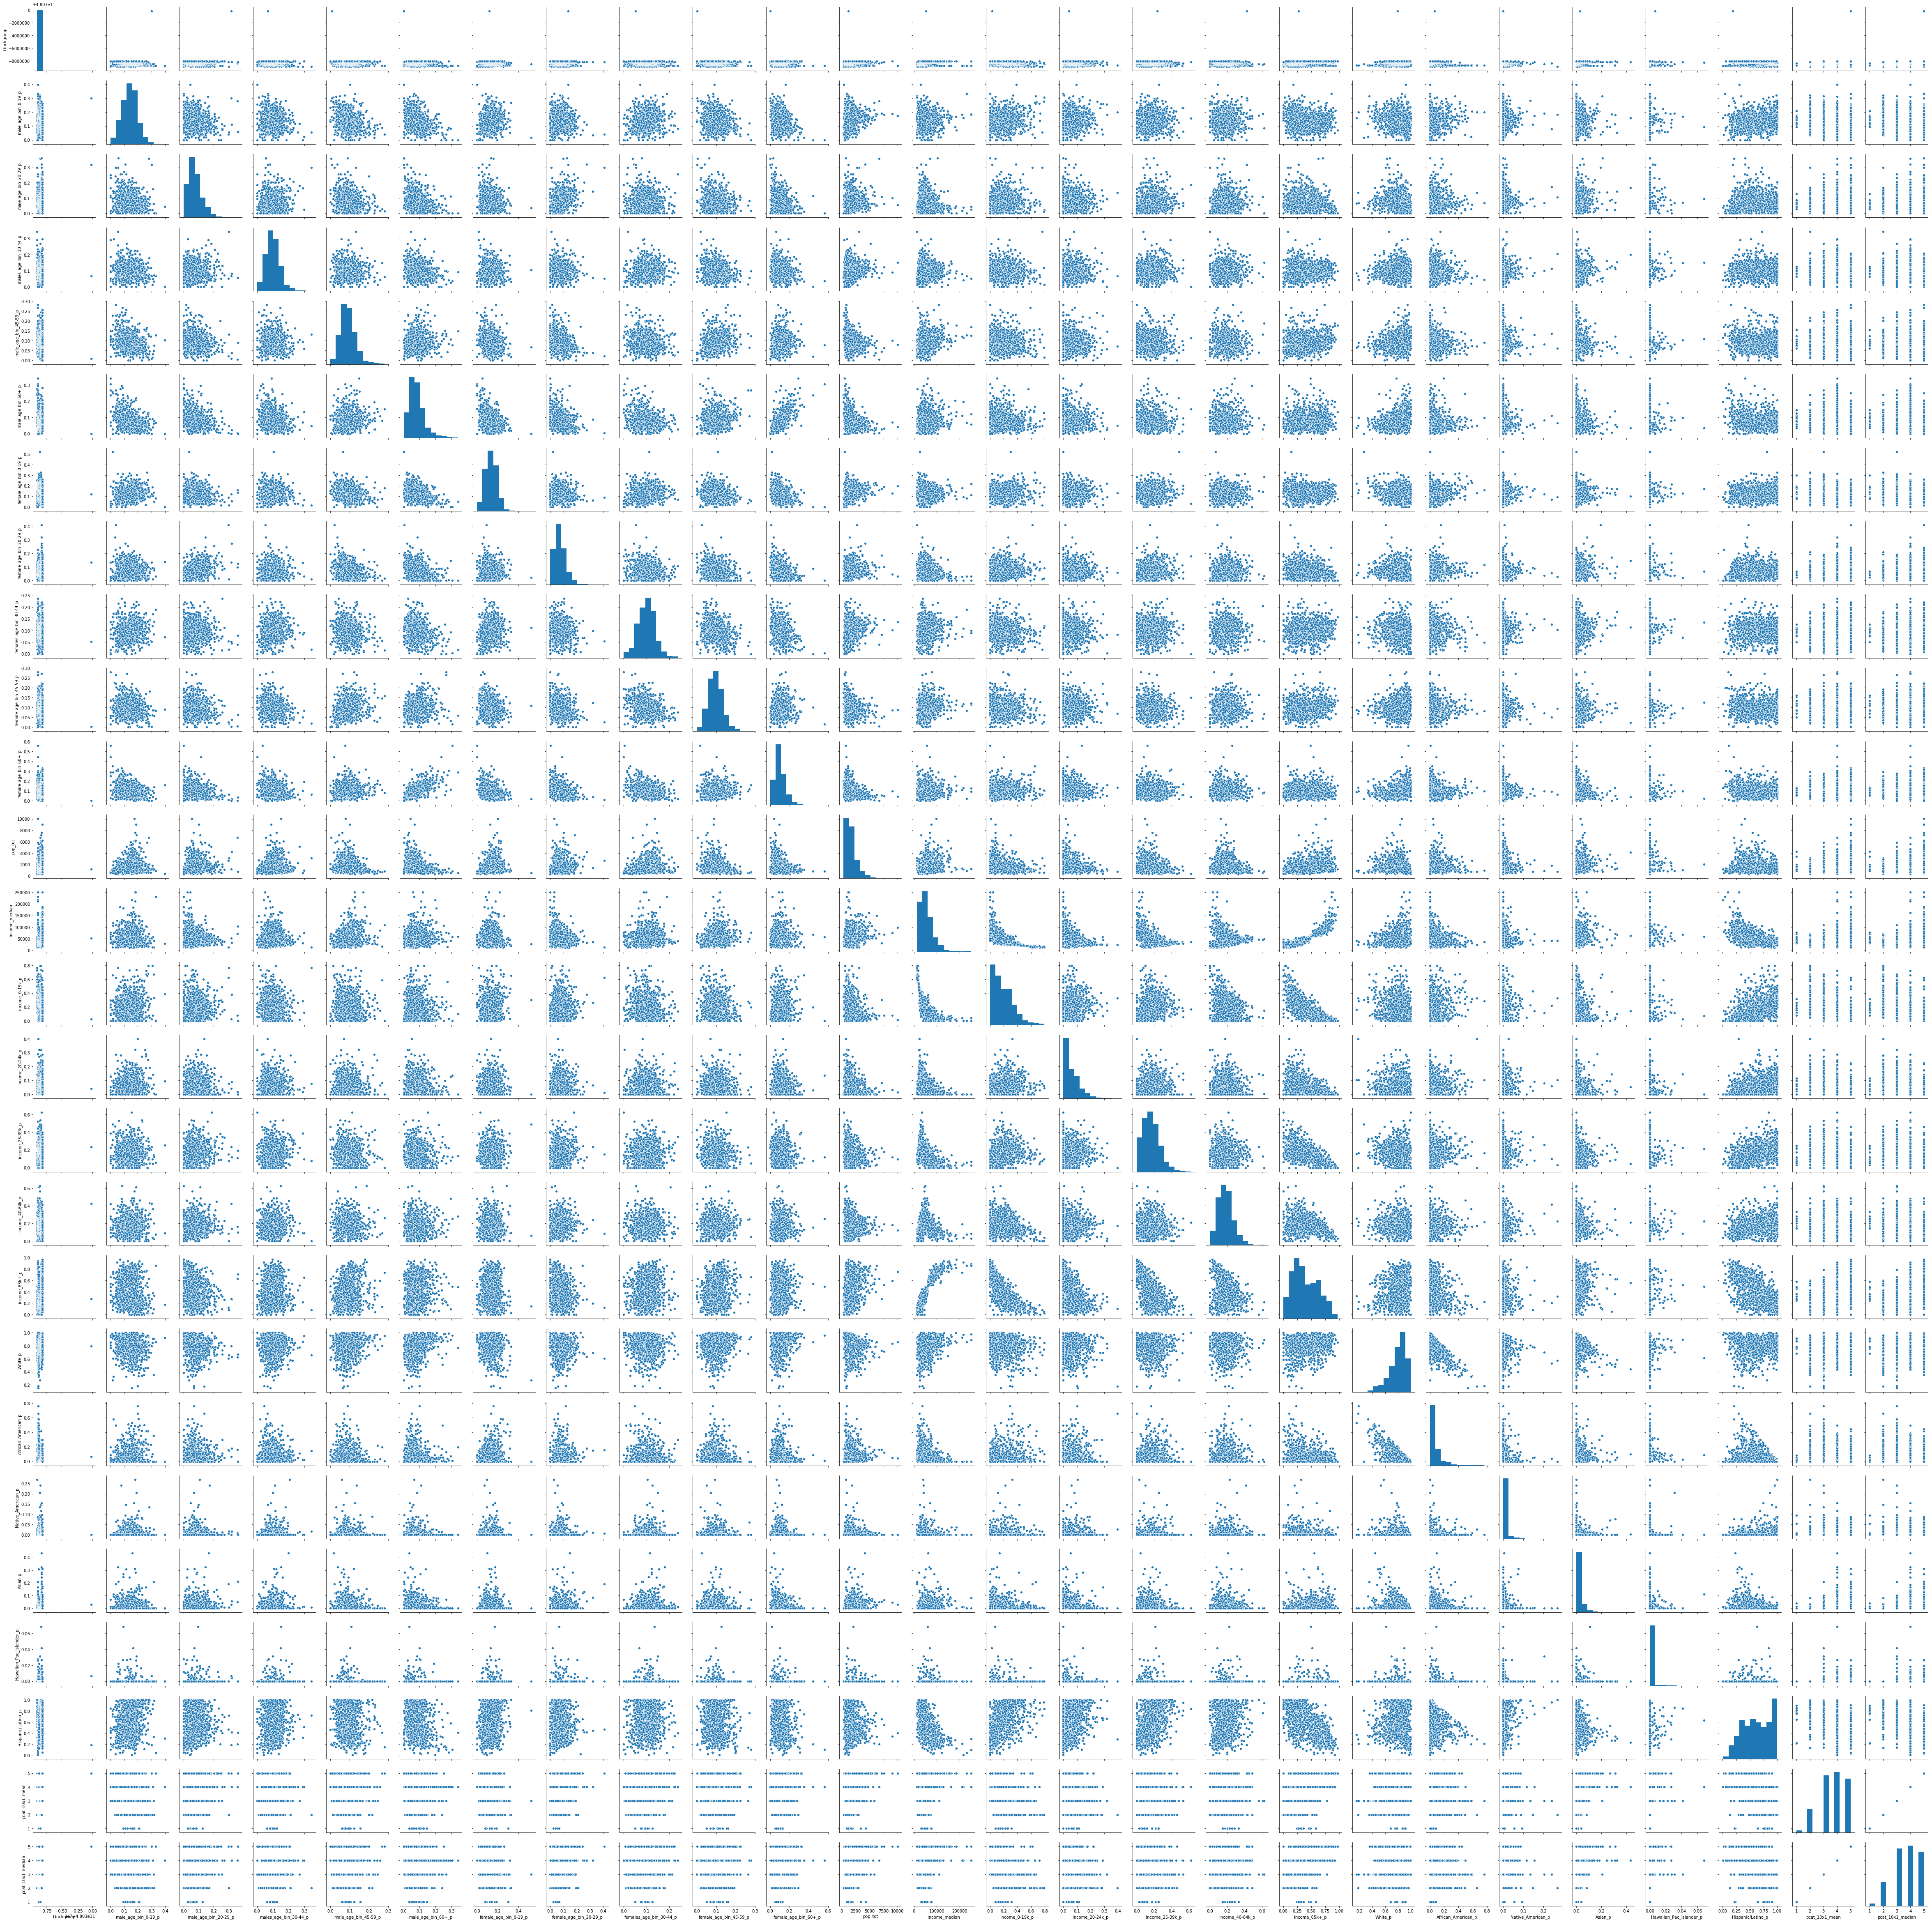

In [9]:
sns.pairplot(df)

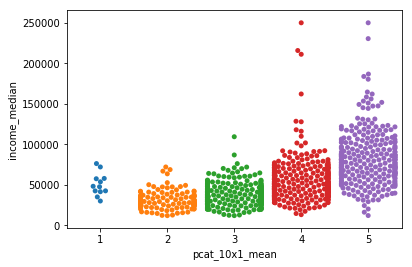

In [10]:
sns.swarmplot(x="pcat_10x1_mean", y="income_median", data=df)

#### What we expected. higher income equals higher connectivity/speeds. 

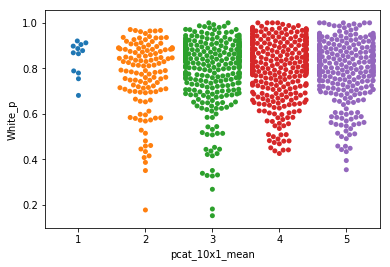

In [11]:
sns.swarmplot(x="pcat_10x1_mean", y="White_p", data=df)

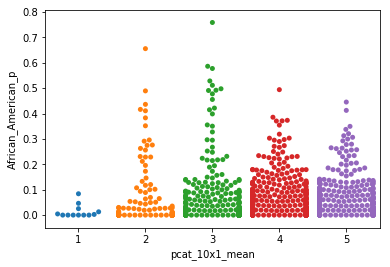

In [12]:
sns.swarmplot(x="pcat_10x1_mean", y="African_American_p", data=df)

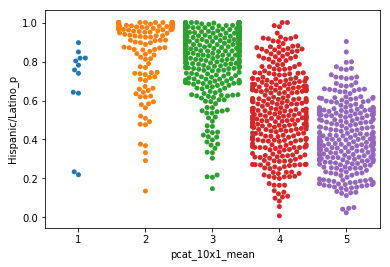

In [13]:
sns.swarmplot(x="pcat_10x1_mean", y="Hispanic/Latino_p", data=df)

#### a great visualization on how race effects broadband connectivity. As the percentage of hispanics go up, the connectivity goes down. Looks the opposite for whites 

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


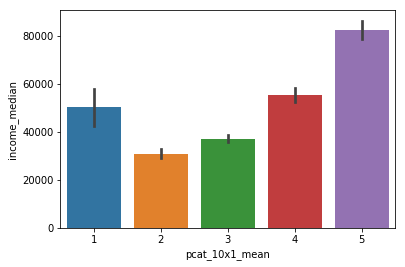

In [14]:
sns.barplot(x="pcat_10x1_mean", y="income_median", data=df)

#### interesting....the 1 connectivity category has a higher income than the 2 and 3 category. It could be due to low population in that area or possibly age

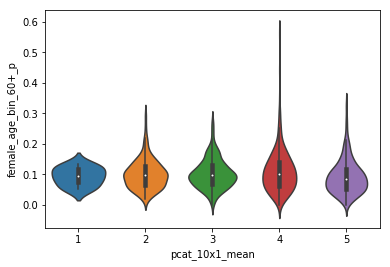

In [15]:
sns.violinplot(x="pcat_10x1_mean", y="female_age_bin_60+_p", data=df)

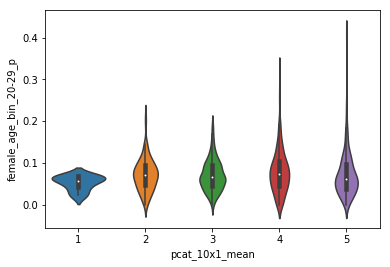

In [16]:
sns.violinplot(x="pcat_10x1_mean", y="female_age_bin_20-29_p", data=df)

#### it appears that there is not a huge difference between these two groups

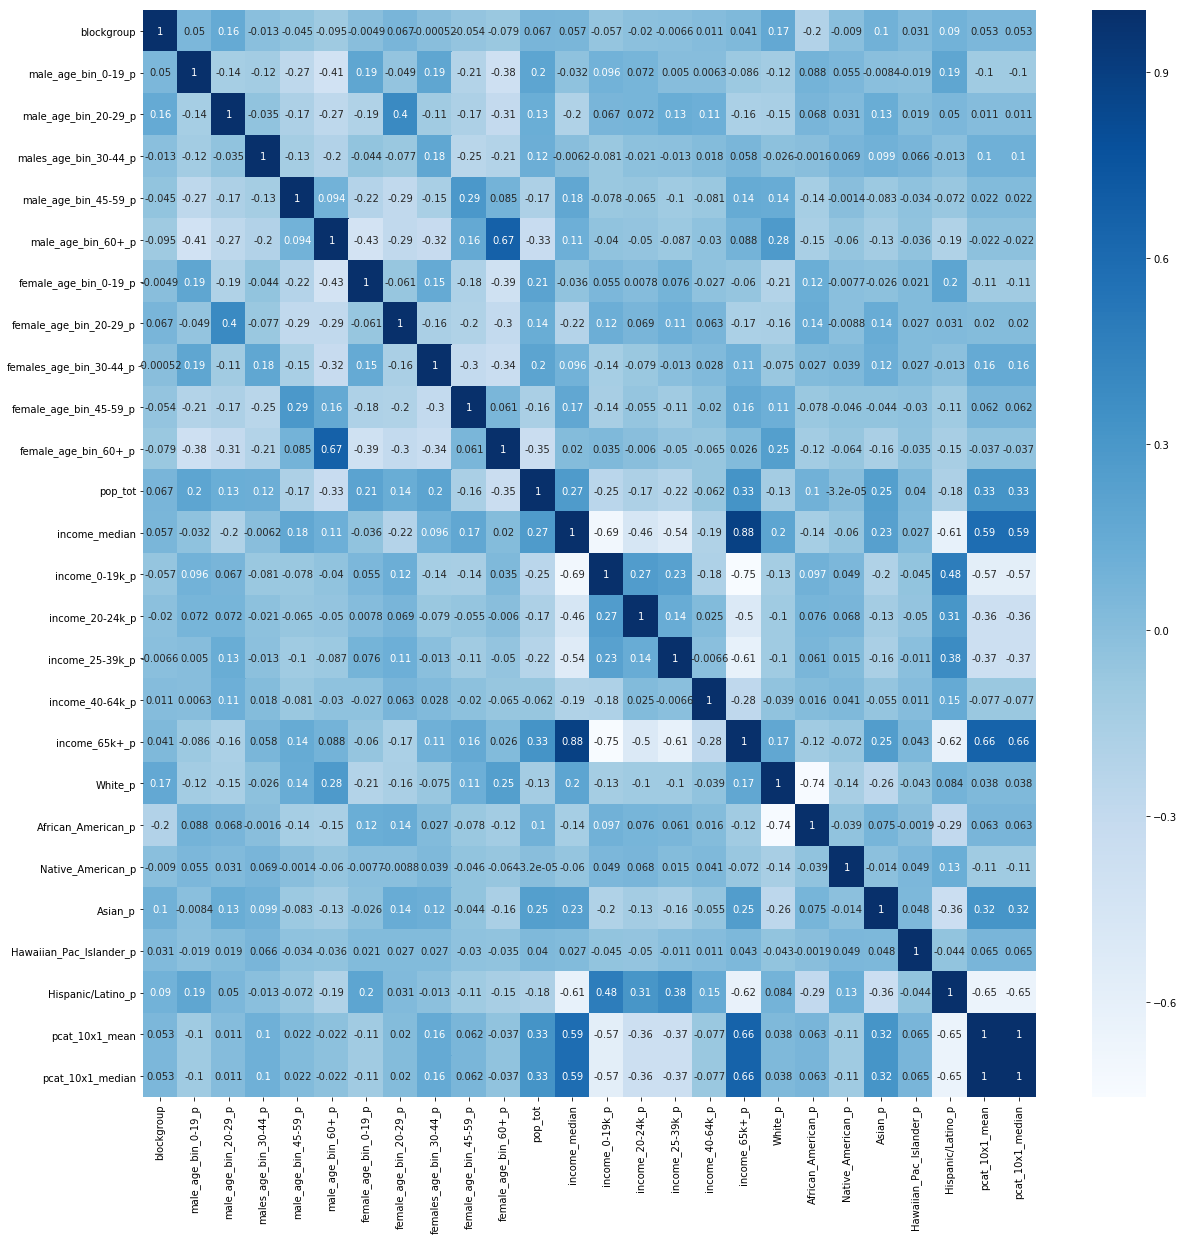

In [17]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), cmap='Blues', annot=True)

#### income median looks to be highly positively correlated with pcat_10x1. There's also a strong negative correlation with the variable Hispanic/Latino and pcat_10x1